# ***Clustering kmeans***

**Referencia de ayuda:**
[Link](https://youtu.be/N5yZNAxLfkU)

### Contenido esperado

# 01_clustering_kmeans.ipynb
- Estandarización
- Elbow Method
- Silhouette Score
- Calinski-Harabasz
- Visualizaciones
- Insights por cluster


Objetivo: Minimzar la distancia entre grupos

**Métricas requeridas** 

- Silhouette Score
- Davies-Bouldin Index,
- Calinski-Harabasz Index
- Elbow Method
- Dendrogramas 

In [2]:
%load_ext kedro.ipython 

[02/23/26 02:56:24] INFO     Using                                                                  ]8;id=495383;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\framework\project\__init__.py\__init__.py]8;;\:]8;id=942033;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\framework\project\__init__.py#270\270]8;;\
                             'C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\ke                
                             dro\framework\project\rich_logging.yml' as logging configuration.                     

                    INFO     Registered line magic '%reload_kedro'                                   ]8;id=211540;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=815355;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\ipython\__init__.py#63\63]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=806318;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=521601;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\ipython\__init__.py#65\65]8;;\

                    INFO     Resolved project path as: C:\Users\brand\Downloads\Proyecto_ML_Kedro.  ]8;id=296847;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=304857;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\ipython\__init__.py#180\180]8;;\
                             To set a different path, run '%reload_kedro <project_root>'                           

2


[02/23/26 02:56:45] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=390490;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=42327;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro_telemetry\plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[02/23/26 02:56:46] INFO     Kedro project machine_learning_project                                 ]8;id=990903;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=442642;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\ipython\__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=202239;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=156244;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\ipython\__init__.py#147\147]8;;\
                             'pipelines'                                                                           

[02/23/26 02:56:48] INFO     Registered line magic 'run_viz'                                        ]8;id=148844;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=509788;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\ipython\__init__.py#153\153]8;;\

In [2]:
catalog.keys()


[
    'DataSetFIFA22',
    'DataSetFIFA21',
    'DataSetFIFA20',
    'preprocess_fifa_22',
    'preprocess_fifa_21',
    'preprocess_fifa_20',
    'FIFA22_processed_con_transformacion_columns',
    'FIFA21_processed_con_transformacion_columns',
    'FIFA20_processed_con_transformacion_columns',
    'model_input_table',
    'X_train_regression',
    'X_test_regression',
    'y_test_regression',
    'X_train_class',
    'X_test_class',
    'y_train_class',
    'y_test_class',
    'grid_linear_model',
    'grid_linear_multiple_model',
    'grid_svr_model',
    'grid_decision_tree_model',
    'grid_randomforest_model',
    'grid_logistic_model_classification',
    'grid_knn_model_classification',
    'grind_svc_cv_model_classification',
    'grid_decision_tree_model_classification',
    'grid_random_forest_model_classification',
    'y_pred_linear_regression',
    'y_pred_linear_multiple_regression',
    'y_pred_svr',
    'y_pred_decision_tree_regression',
    'y_pred_random_forest_regres

In [3]:
df_FIFA = catalog.load("model_input_table")

[02/22/26 02:55:33] INFO     Loading data from model_input_table (ParquetDataset)...           ]8;id=428508;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=6625;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

#### **Importaciónes**

In [4]:
# -- Tratamiento de datos --
import numpy as np
import pandas as pd

# -- Gráficos -- 
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

# -- Procesado y modelado --
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

**Métricas requeridas** 

- Silhouette Score
- Davies-Bouldin Index,
- Calinski-Harabasz Index
- Elbow Method
- Dendrogramas 

In [22]:
df_FIFA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50526 entries, 0 to 50525
Data columns (total 70 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      50526 non-null  object 
 1   Age                       50526 non-null  int64  
 2   Nationality               50526 non-null  object 
 3   Overall                   50526 non-null  int64  
 4   Potential                 50526 non-null  int64  
 5   Club                      50526 non-null  object 
 6   Special                   50526 non-null  int64  
 7   Preferred Foot            50526 non-null  object 
 8   International Reputation  50526 non-null  float64
 9   Weak Foot                 50526 non-null  float64
 10  Skill Moves               50526 non-null  float64
 11  Work Rate                 50526 non-null  object 
 12  Body Type                 50526 non-null  object 
 13  Position                  50526 non-null  object 
 14  Jersey

#### **Antes de**

- Usar el el dataset procesado, no el original.
- Realizar un nuevo procesamiento para el aprendizaje no supervizados.
- Usa el dataset procesado… pero no el mismo que usamos para los modelos supervisados.
- Debe ser otro pipeline de procesamiento (normalización, encoding, imputación), exclusivo para no supervisados.

**Usa el dataset procesado para no supervisado, que debe cumplir:**

- Sin columnas de target
- Sin columnas categóricas sin codificar
- Con escalado uniforme (StandardScaler o MinMa
- Estandarización especial para clustering
  - Ej:
  - StandardScaler
  - MinMax
  - RobustScaler
  - (dependiendo del dataset y técnica)
- Sin one-hot innecesarios (UMAP y t-SNE sufren con alta dimensionalidad)
- Sin nulos
- Sin outliers extremos (si decides filtrarlos)

Los modelos no supervisados necesitan un dataset neutral, sin transformaciones que dependan del target.

**¿El dataset debe ser neutral?**

R: (Consejo para mi yo del futuro) no olviar que hicimos ese dataset con variables creadas por lo que necesitamo que no hayan modificaciónes con targets creadas.
es por eso que se deberan eliminar. (en conclusion) tener cuidado con este punto.

**Ese será el que alimentarás a:**

- KMeans
- DBSCAN
- Hierarchical clustering
- PCA
- t-SNE / UMAP
- Anomaly detection

#### **Columnas aeliminar (ruido total / no sirven para modelos)**
- ID
- Name
- Photo
Flag
Club Logo
Joined
Loaned From
Contract Valid Until
Best Position
Position
Body Type
Real Face
Preferred Foot
Work Rate
Year_Joined

### **Desarrollo Clustering kmeans**

**Objetivo:**  
Descubrir estructura oculta en los jugadores de FIFA 22 utilizando el algoritmo **KMeans**.  

- Antes de empezar usaremos - preprocess_fifa_21 como prueba
- trabajaremos con FIFA 22, pero generaremos un nuevo procesado exclusivo para no supervisado.

#### **Features seleccionadas**
##### Justificación
- Incluyen atributos técnicos, físicos y de reputación.
- No están altamente correlacionados entre sí.
- Son útiles para identificar **arquetipos de jugadores**.
- Funcionan para todos los modelos no supervisados


In [23]:
# 1. Cargar dataset procesado
df_fifa_22 = catalog.load("FIFA22_processed_con_transformacion2_columns")

# 2. Selección de features
features = [
    "Age",
    "Overall",
    "Potential",
    "BallControl",
    "Dribbling",
    "Finishing",
    "ShortPassing",
    "Acceleration",
    "SprintSpeed",
    "Agility",
    "Stamina",
    "Strength",
]

X = df_fifa_22[features]

                    INFO     Loading data from FIFA22_processed_con_transformacion2_columns    ]8;id=346593;file:///usr/local/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=443331;file:///usr/local/lib/python3.11/site-packages/kedro/io/data_catalog.py#1046\1046]8;;\
                             (ParquetDataset)...                                                                   

### Estandarización

K-Means es sensible a la escala, por lo que estandarizamos las variables.

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Elbow Method
Probamos distintos valores de *k* para elegir el número óptimo de clusters.

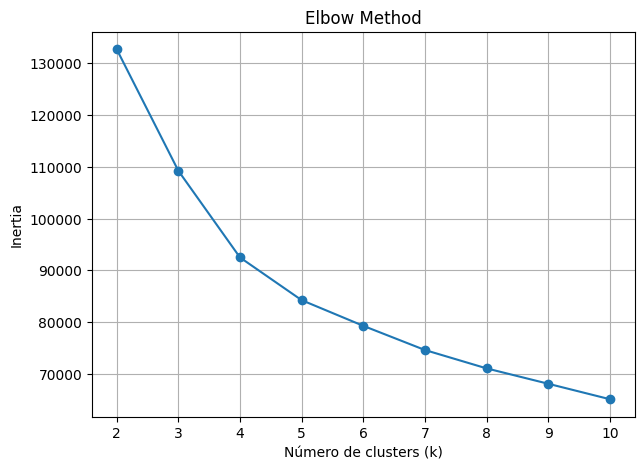

In [25]:
from sklearn.cluster import KMeans

inertias = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7,5))
plt.plot(range(2,11), inertias, marker="o")
plt.title("Elbow Method")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

### 5. Silhouette Score

Medimos qué tan separadas están las agrupaciones para cada *k*.

In [30]:
from sklearn.metrics import silhouette_score

sil_scores = {}

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores[k] = sil

sil_scores


{
    2: np.float64(0.42586272731933805),
    3: np.float64(0.20858593611694265),
    4: np.float64(0.21415289338995533),
    5: np.float64(0.1891402511529244),
    6: np.float64(0.1793015814815067),
    7: np.float64(0.17561279869503038),
    8: np.float64(0.1771123094883856),
    9: np.float64(0.16956775616931014),
    10: np.float64(0.15842093993671036)
}

### Entrenar modelo K-Means 

Seleccionamos el valor óptimo de k basado en:  
- Silhouette Score  
- Elbow Method  

In [31]:
k_opt = 4   # EJEMPLO, insertar según lo que salga arriba

kmeans_final = KMeans(n_clusters=k_opt, random_state=42)
cluster_labels = kmeans_final.fit_predict(X_scaled)

df_fifa_22["Cluster_KMeans"] = cluster_labels
df_fifa_22.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,...,Height_cm,Weight_kg,Value_num,Wage_num,Release Clause_num,Best_Position_Grouped_FW,Best_Position_Grouped_GK,Best_Position_Grouped_MF,Overall_Class_Encoded,Cluster_KMeans
0,212198,Bruno Fernandes,26,Portugal,88,89,Manchester United,2341,Right,3.0,...,179,69.0,107500000.0,250000.0,206900000.0,False,False,True,0,2
1,209658,L. Goretzka,26,Germany,87,88,FC Bayern München,2314,Right,4.0,...,189,82.0,93000000.0,140000.0,160400000.0,False,False,True,0,2
2,176580,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,2307,Right,5.0,...,182,83.0,44500000.0,135000.0,91200000.0,True,False,False,0,2
4,224334,M. Acuña,29,Argentina,84,84,Sevilla FC,2292,Left,2.0,...,172,69.0,37000000.0,45000.0,77700000.0,False,False,False,0,2
5,212622,J. Kimmich,26,Germany,89,90,FC Bayern München,2283,Right,4.0,...,177,75.0,108000000.0,160000.0,186300000.0,False,False,True,0,2


### PCA a 2 componentes para visualizar clusters
- Mencionar este grafico en kedro viz

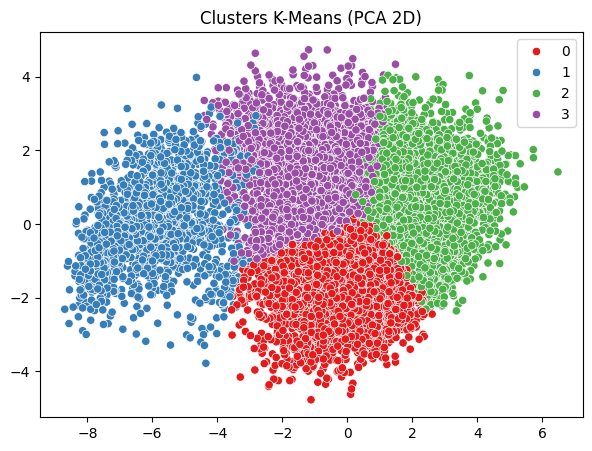

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=cluster_labels, palette="Set1")
plt.title("Clusters K-Means (PCA 2D)")
plt.show()

### Insights por cluster

Promedio de atributos por cluster.

In [33]:
df_fifa_22.groupby("Cluster_KMeans")[features].mean()

,Age,Overall,Potential,BallControl,Dribbling,Finishing,ShortPassing,Acceleration,SprintSpeed,Agility,Stamina,Strength
Cluster_KMeans,,,,,,,,,,,,
0,21.932200,62.192566,71.337691,61.258685,60.875607,49.496825,59.327606,72.087972,71.480202,69.633358,63.001121,58.394471
1,26.391708,66.353960,71.831683,21.807550,15.139233,12.543936,29.344678,39.527228,39.837871,41.355198,32.313119,62.013614
2,26.778836,72.924162,75.754321,72.909347,72.004409,62.349206,71.060141,74.941623,74.571076,74.843210,73.732099,67.253086
3,28.740684,67.904689,70.008619,61.483397,54.423321,43.140938,63.295817,55.066667,56.709506,55.597972,65.870976,77.240558


 Interpretación del K-Means

In [3]:
catalog.keys()




[
    'DataSetFIFA22',
    'DataSetFIFA21',
    'DataSetFIFA20',
    'preprocess_fifa_22',
    'preprocess_fifa_21',
    'preprocess_fifa_20',
    'FIFA22_processed_con_transformacion_columns',
    'FIFA21_processed_con_transformacion_columns',
    'FIFA20_processed_con_transformacion_columns',
    'model_input_table',
    'X_train_regression',
    'X_test_regression',
    'y_test_regression',
    'X_train_class',
    'X_test_class',
    'y_train_class',
    'y_test_class',
    'grid_linear_model',
    'grid_linear_multiple_model',
    'grid_svr_model',
    'grid_decision_tree_model',
    'grid_randomforest_model',
    'grid_logistic_model_classification',
    'grid_knn_model_classification',
    'grind_svc_cv_model_classification',
    'grid_decision_tree_model_classification',
    'grid_random_forest_model_classification',
    'y_pred_linear_regression',
    'y_pred_linear_multiple_regression',
    'y_pred_svr',
    'y_pred_decision_tree_regression',
    'y_pred_random_forest_regres

In [4]:
nosup_cluster = catalog.load("clustered_dataset")
nosup_deteccion = catalog.load("clean_dataset")
nosup_reduccion = catalog.load("pca_output")

[02/23/26 02:58:28] INFO     Loading data from clustered_dataset (ParquetDataset)...           ]8;id=38701;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=699031;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

[02/23/26 02:58:29] INFO     Loading data from clean_dataset (ParquetDataset)...               ]8;id=362450;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=463014;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

                    INFO     Loading data from pca_output (ParquetDataset)...                  ]8;id=894380;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=57486;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

In [14]:
nosup_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 13389 to 17102
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       2000 non-null   int64  
 1   Overall                   2000 non-null   int64  
 2   Potential                 2000 non-null   int64  
 3   Special                   2000 non-null   int64  
 4   International Reputation  2000 non-null   float64
 5   Weak Foot                 2000 non-null   float64
 6   Skill Moves               2000 non-null   float64
 7   Jersey Number             2000 non-null   float64
 8   Crossing                  2000 non-null   float64
 9   Finishing                 2000 non-null   float64
 10  HeadingAccuracy           2000 non-null   float64
 11  ShortPassing              2000 non-null   float64
 12  Volleys                   2000 non-null   float64
 13  Dribbling                 2000 non-null   float64
 14  Curve   

In [15]:
nosup_cluster.head()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Joined_Year,Joined_Month,Joined_Day,Height_cm,Weight_kg,Value_num,Wage_num,Release Clause_num,Year,clustered_data
13389,31,61,61,1310,1.0,3.0,2.0,4.0,29.0,24.0,...,0,0,0,188,77.000000,220000.0,6000.0,473000.0,2022,2
28194,20,56,68,1356,1.0,3.0,2.0,16.0,28.0,55.0,...,0,0,0,180,72.121128,160000.0,5000.0,376000.0,2021,2
26766,24,64,71,1462,1.0,2.0,2.0,77.0,58.0,28.0,...,0,0,0,183,83.914520,575000.0,2000.0,978000.0,2021,2
20430,23,64,69,1739,1.0,3.0,3.0,22.0,68.0,47.0,...,0,0,0,175,73.935496,600000.0,1000.0,795000.0,2021,2
16436,33,72,72,1933,1.0,3.0,3.0,12.0,71.0,50.0,...,0,0,0,178,69.853168,1400000.0,36000.0,2400000.0,2021,2


In [13]:
nosup_deteccion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44067 entries, 3 to 44960
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       44067 non-null  int64  
 1   Overall                   44067 non-null  int64  
 2   Potential                 44067 non-null  int64  
 3   Special                   44067 non-null  int64  
 4   International Reputation  44067 non-null  float64
 5   Weak Foot                 44067 non-null  float64
 6   Skill Moves               44067 non-null  float64
 7   Jersey Number             44067 non-null  float64
 8   Crossing                  44067 non-null  float64
 9   Finishing                 44067 non-null  float64
 10  HeadingAccuracy           44067 non-null  float64
 11  ShortPassing              44067 non-null  float64
 12  Volleys                   44067 non-null  float64
 13  Dribbling                 44067 non-null  float64
 14  Curve      

In [11]:
nosup_reduccion.info


<bound method DataFrame.info of                 PC1            PC2           PC3         PC4        PC5
13389 -4.916428e+06 -107891.966929   1779.418906 -263.965748  72.573209
28194 -5.030110e+06 -117144.692927    927.063642 -210.558922 -45.034556
26766 -4.305177e+06  -21785.980108  -3086.647683 -110.215225  60.184977
20430 -4.456722e+06   83797.432566  -4126.795370  169.467110   5.298560
16436 -2.663452e+06   65295.977231  28877.897826  254.313973  13.694353
...             ...            ...           ...         ...        ...
23477 -3.057837e+06 -266597.510466  -1007.091539   49.889950 -71.952902
20221 -4.382633e+06   17830.791577  -2077.863398  174.841888 -11.541984
11744 -2.222400e+06 -609629.515593   -263.439847  -67.795581 -39.560763
35834 -5.145052e+05  314001.694524  -2060.125647   68.404652  68.051836
17102  1.497905e+06  295729.963601  25695.619053  153.219085  47.364685

[2000 rows x 5 columns]>